# Introduction

1. Testing on frozenlake, should be super simple

(episode, mean score) = (100, 0.0)
(episode, mean score) = (200, 0.0)
(episode, mean score) = (300, 0.0)
(episode, mean score) = (400, 0.0)
(episode, mean score) = (500, 0.0)
(episode, mean score) = (600, 0.0)
(episode, mean score) = (700, 0.0)
(episode, mean score) = (800, 0.0)
(episode, mean score) = (900, 0.0)
(episode, mean score) = (1000, 0.0)
(episode, mean score) = (1100, 0.0)
(episode, mean score) = (1200, 0.0)
(episode, mean score) = (1300, 0.0)
(episode, mean score) = (1400, 0.0)
(episode, mean score) = (1500, 0.0)
(episode, mean score) = (1600, 0.0)
(episode, mean score) = (1700, 0.0)
(episode, mean score) = (1800, 0.0)
(episode, mean score) = (1900, 0.0)
(episode, mean score) = (2000, 0.0)
(episode, mean score) = (2100, 0.0)
(episode, mean score) = (2200, 0.0)
(episode, mean score) = (2300, 0.0)
(episode, mean score) = (2400, 0.0)
(episode, mean score) = (2500, 0.0)
(episode, mean score) = (2600, 0.0)
(episode, mean score) = (2700, 0.0)
(episode, mean score) = (2800, 0.0)
(

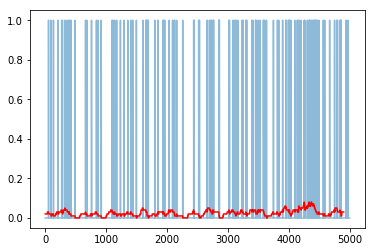

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent import Agent
%matplotlib inline


#Environment
env = gym.make('FrozenLake-v0')
env.seed(0)
input_dim = env.observation_space.n
output_dim = env.action_space.n


#Agent
lr,gamma,tau = 3*10**-4, 0.99, 0.1 
clipnorm, verbose, alpha = False, False, 0.001
agent = Agent(input_dim, output_dim, lr, gamma, tau, alpha, clipnorm, verbose)
agent.memory_size = 1000
agent.batchsize = 32


#Train
EPISODES = 5000
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.array([1 if i == state else 0 for i in range(input_dim)])
    state = agent.make_tensor(state)
    reward_sum = 0
    done = False
    while not done:
        
        #Do main step
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.array([1 if i == next_state else 0 for i in range(input_dim)])
        reward_sum += reward
        next_state = agent.make_tensor(next_state)
        agent.remember(state[0],action,reward,next_state[0],done) #want to remember state as a vec
        state = next_state

        #Learn
        if e > 100:
            agent.learn()
    
    #Print results
    scores.append(reward_sum)
    if e % 100 == 0:
        print '(episode, mean score) = ' + str((e,np.mean(scores[e-99:e])))
plt.plot(scores,alpha=0.5)
plt.plot(agent.window_average(scores,100),'r-')

(episode, mean score) = (100, 0.010101010101010102)
(episode, mean score) = (200, 0.030303030303030304)
(episode, mean score) = (300, 0.04040404040404041)
(episode, mean score) = (400, 0.030303030303030304)
(episode, mean score) = (500, 0.010101010101010102)
(episode, mean score) = (600, 0.010101010101010102)
(episode, mean score) = (700, 0.030303030303030304)
(episode, mean score) = (800, 0.020202020202020204)
(episode, mean score) = (900, 0.020202020202020204)
(episode, mean score) = (1000, 0.030303030303030304)
(episode, mean score) = (1100, 0.030303030303030304)
(episode, mean score) = (1200, 0.0)
(episode, mean score) = (1300, 0.020202020202020204)
(episode, mean score) = (1400, 0.010101010101010102)
(episode, mean score) = (1500, 0.020202020202020204)
(episode, mean score) = (1600, 0.010101010101010102)
(episode, mean score) = (1700, 0.030303030303030304)
(episode, mean score) = (1800, 0.04040404040404041)
(episode, mean score) = (1900, 0.010101010101010102)
(episode, mean score)

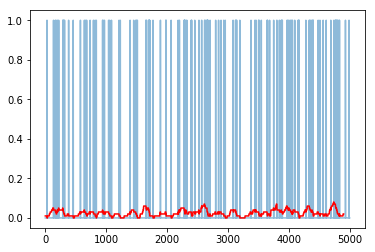

In [26]:
#Train
EPISODES = 5000
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.array([1 if i == state else 0 for i in range(input_dim)])
    state = agent.make_tensor(state)
    reward_sum = 0
    done = False
    while not done:
        
        #Do main step
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.array([1 if i == next_state else 0 for i in range(input_dim)])
        reward_sum += reward
        next_state = agent.make_tensor(next_state)
        agent.remember(state[0],action,reward,next_state[0],done) #want to remember state as a vec
        state = next_state

        #Learn
        if e > 100:
            agent.learn()
    
    #Print results
    scores.append(reward_sum)
    if e % 100 == 0:
        print '(episode, mean score) = ' + str((e,np.mean(scores[e-99:e])))
plt.plot(scores,alpha=0.5)
plt.plot(agent.window_average(scores,100),'r-')